In [1]:
#importing the required libraries
import sklearn
import numpy as np #working with arrays. 
import pandas as pd #data manipulation library that is necessary for every aspect of data analysis or machine learning.

In [2]:
#Loading the dataset
dataset = pd.read_csv("C:/Users/Uzzi-Azree/Documents/AI assignment 2 group work/diabetes.csv")

In [3]:
#Exploratory Data Analysis
dataset.shape #returns the orientation of the dataset i.e number of columns and rows.

(768, 9)

In [4]:
dataset.head(10) #returns part of the dataset with agiven number of colums

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
dataset.describe() #returns some statistical information for the data

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
#Number of rows belonging to each class
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [7]:
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = dataset[feature_columns].values
y = dataset['Outcome'].values
# Alternative way of selecting features and labels arrays:
# X = dataset.iloc[:, 1:5].values
# y = dataset.iloc[:, 5].values

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
#Spliting dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

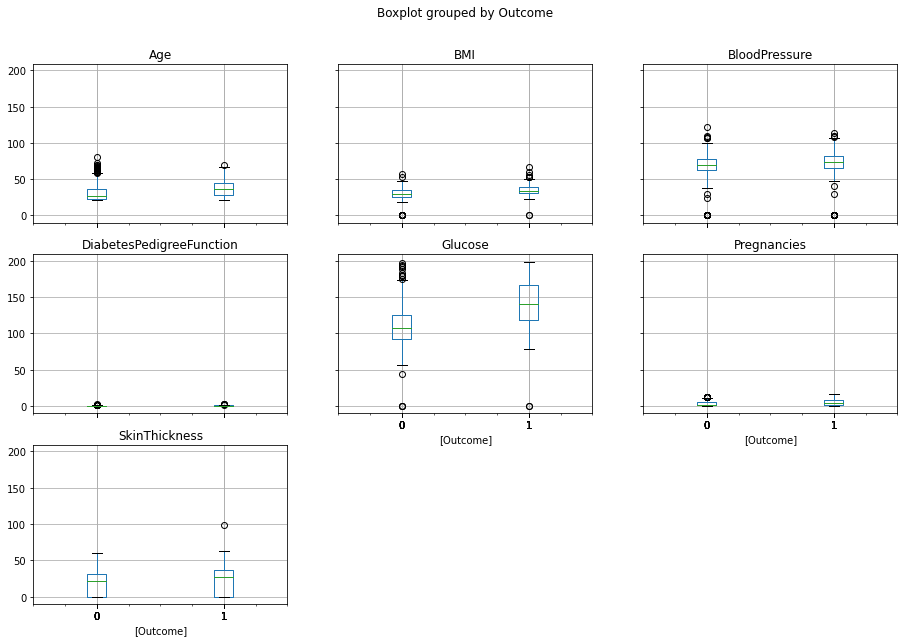

In [11]:
plt.figure()
dataset.drop("Insulin", axis=1).boxplot(by="Outcome", figsize=(15, 10))
plt.show()

In [12]:
#KNN Predicions
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
#Model Evaluation
#Building a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[83, 24],
       [19, 28]], dtype=int64)

In [14]:
#Calculating Model Accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 4)) + ' %.')

Accuracy of our model is equal 72.0779 %.


In [16]:
#Predict Output
x1=float(input("Enter your number of Pregnancy:"))
x2=float(input("Enter your Glucose amount:"))
x3=float(input("Enter your BloodPressure amount:"))
x4=float(input("Enter your Skin Thickness amount:"))
x5=float(input("Enter your Insulin amount:"))
x6=float(input("Enter your BMI amount:"))
x7=float(input("Enter your DiabetesPedigreeFunction amount:"))
x8=float(input("Enter your Age amount:"))
predicted_class= classifier.predict([[x1,x2,x3,x4,x5,x6,x7,x8]])#x1,x2,x3,x4 are the different values entered by users for the features
#print(predicted)
if predicted_class==0:
    print("...72% chances of not getting Diabetes...")
elif predicted_class==1:
     print("...72% chances of getting Diabetes...")
else:
    print("...Out of range for the moment...")

Enter your number of Pregnancy:6
Enter your Glucose amount:148
Enter your BloodPressure amount:150
Enter your Skin Thickness amount:15
Enter your Insulin amount:0
Enter your BMI amount:50
Enter your DiabetesPedigreeFunction amount:75
Enter your Age amount:45
...72% chances of getting Diabetes...
